In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")
import sys
seed = 782
np.random.seed(seed)


In [13]:
df = pd.read_csv("digit_train.csv")
train = df.as_matrix()



train_y = train[:30000,0].astype('int8')
train_x = train[:30000,1:].astype('float64')

test_y = train[30000:,0].astype('int8')
test_x = train[30000:,1:].astype('float64')

print("Shape Train images: (%d, %d)" %train_x.shape)
print("Shape Labels: (%d)" % train_y.shape)
print("Shape Train Images: (%d, %d)"% test_x.shape)
print("Shape Labels: (%d)" % test_y.shape)

Shape Train images: (30000, 784)
Shape Labels: (30000)
Shape Train Images: (12000, 784)
Shape Labels: (12000)


In [12]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image, shape)
    plt.imshow(img, cmap=cmp, interpolation='none')
    plt.title(label)

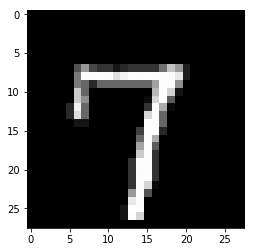

In [24]:
show_image(train_x[6], (28,28), cmp="gray")

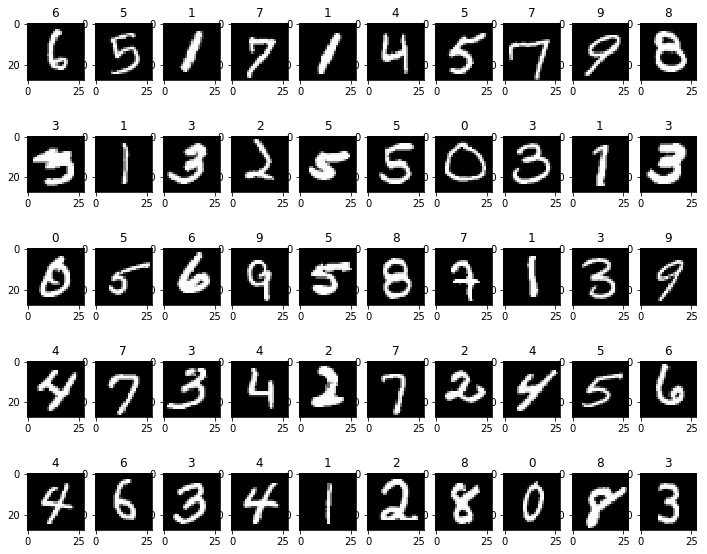

In [26]:
%matplotlib inline
plt.figure(figsize=(12,10))

y,x= 5, 10
for i in range(0, (x*y)):
    plt.subplot(y,x,i+1)
    ni = np.random.randint(0,train_x.shape[0],1)[0]
    show_image(train_x[ni],(28,28), train_y[ni], cmp="gray")
plt.show()
    

In [51]:
def count_example_per_digit(examples):
    bins = [0,1,2,3,4,5,6,7,8,9,10]    
    plt.hist(examples, bins, label="counts")
    plt.legend()
    plt.xticks(bins)
    plt.tight_layout()
    
        

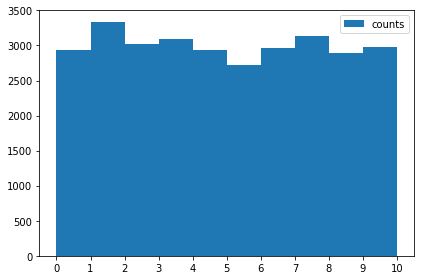

In [52]:
count_example_per_digit(train_y)

In [112]:
from sklearn.neural_network import MLPClassifier

train_y

array([1, 0, 1, ..., 2, 3, 0], dtype=int8)

In [61]:
mlp = MLPClassifier(hidden_layer_sizes=[30,], max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

from sklearn import preprocessing




In [69]:
#sc = preprocessing.StandardScaler.fit(train_x)
#train_x_std = sc.fit_transform(train_x)
#test_x_std = sc.fit_transform(test_x)

train_x = train_x/255.
test_x = test_x/255.

mlp.fit(train_x, train_y)

Iteration 1, loss = 0.45132812
Iteration 2, loss = 0.22552462
Iteration 3, loss = 0.18022069
Iteration 4, loss = 0.15208298
Iteration 5, loss = 0.13651977
Iteration 6, loss = 0.11909440
Iteration 7, loss = 0.10917186
Iteration 8, loss = 0.10096336
Iteration 9, loss = 0.09140311
Iteration 10, loss = 0.08511767


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[30], learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [70]:
mlp.score(train_x, train_y)

0.97596666666666665

In [71]:
mlp.score(test_x, test_y)

0.95466666666666666

In [66]:
preprocessing.StandardScaler.fit?

In [73]:
fig, axes = plt.subplot(4,4)
vmin, vmax, mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, mlp.coefs_[0].max()):
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray, vmin=.5*vmin, 
              vmax=.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

ValueError: Illegal argument(s) to subplot: (4, 4)

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {"hidden_layer_sizes": [(40,),(35,)],
              "learning_rate_init": [0.1, 0.2],
              "tol": [1e-3,1e-4],
              "epsilon": [1e-3, 1e-7, 1e-8, 1e-9]}

In [100]:
estimator = GridSearchCV(mlp, param_grid = param_grid)

In [101]:
estimator.fit(train_x, train_y)

Iteration 1, loss = 0.53695208
Iteration 2, loss = 0.25825986
Iteration 3, loss = 0.20772753
Iteration 4, loss = 0.17728622
Iteration 5, loss = 0.15360470
Iteration 6, loss = 0.13947020
Iteration 7, loss = 0.12655701
Iteration 8, loss = 0.11772564
Iteration 9, loss = 0.10486691
Iteration 10, loss = 0.09623685
Iteration 1, loss = 0.53281002
Iteration 2, loss = 0.25866251
Iteration 3, loss = 0.20826052
Iteration 4, loss = 0.17454317
Iteration 5, loss = 0.15126524
Iteration 6, loss = 0.13344943
Iteration 7, loss = 0.12083509
Iteration 8, loss = 0.10844875
Iteration 9, loss = 0.09794414
Iteration 10, loss = 0.08692843
Iteration 1, loss = 0.53139858
Iteration 2, loss = 0.25260228
Iteration 3, loss = 0.20332446
Iteration 4, loss = 0.26054551
Iteration 5, loss = 0.15742678
Iteration 6, loss = 0.13507657
Iteration 7, loss = 0.11951732
Iteration 8, loss = 0.10793472
Iteration 9, loss = 0.11183460
Iteration 10, loss = 0.08737538
Iteration 1, loss = 0.53695208
Iteration 2, loss = 0.25825986
Itera

Iteration 5, loss = 0.12457541
Iteration 6, loss = 0.10350009
Iteration 7, loss = 0.08748259
Iteration 8, loss = 0.07668430
Iteration 9, loss = 0.06574267
Iteration 10, loss = 0.05651468
Iteration 1, loss = 0.49058776
Iteration 2, loss = 0.23376633
Iteration 3, loss = 0.17466378
Iteration 4, loss = 0.15225649
Iteration 5, loss = 0.13894194
Iteration 6, loss = 0.10032304
Iteration 7, loss = 0.08324941
Iteration 8, loss = 0.07771976
Iteration 9, loss = 0.06221063
Iteration 10, loss = 0.05579268
Iteration 1, loss = 2.34260015
Iteration 2, loss = 2.14886463
Iteration 3, loss = 2.09475263
Iteration 4, loss = 2.10229481
Iteration 5, loss = 2.11440993
Iteration 6, loss = 2.11748273
Training loss did not improve more than tol=0.010000 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.18185742
Iteration 2, loss = 2.02238859
Iteration 3, loss = 1.88130254
Iteration 4, loss = 1.93908303
Iteration 5, loss = 1.97785277
Iteration 6, loss = 2.00253985
Training loss did not improve more than

Iteration 1, loss = 1.87127182
Iteration 2, loss = 1.62047412
Iteration 3, loss = 1.81158201
Iteration 4, loss = 1.97562672
Iteration 5, loss = 1.99099006
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.95757590
Iteration 2, loss = 1.86309499
Iteration 3, loss = 1.99902641
Iteration 4, loss = 1.98304667
Iteration 5, loss = 1.92224295
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.15750298
Iteration 2, loss = 1.95112950
Iteration 3, loss = 2.02214689
Iteration 4, loss = 2.00088135
Iteration 5, loss = 1.99149022
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.50599556
Iteration 2, loss = 0.23863333
Iteration 3, loss = 0.18214889
Iteration 4, loss = 0.14587668
Iteration 5, loss = 0.12118906
Iteration 6, loss = 0.10179355
Iteration 7, loss = 0.08626492
Iteration 8, loss = 0.07634892
Iteration 9, l

Iteration 5, loss = 0.13135969
Iteration 6, loss = 0.11355115
Iteration 7, loss = 0.09644722
Iteration 8, loss = 0.08392423
Iteration 9, loss = 0.07303382
Iteration 10, loss = 0.06393290
Iteration 1, loss = 0.52459440
Iteration 2, loss = 0.24166603
Iteration 3, loss = 0.18620071
Iteration 4, loss = 0.15008212
Iteration 5, loss = 0.12376611
Iteration 6, loss = 0.12078958
Iteration 7, loss = 0.09637790
Iteration 8, loss = 0.08101470
Iteration 9, loss = 0.10801892
Iteration 10, loss = 0.11200647
Iteration 1, loss = 0.51894432
Iteration 2, loss = 0.24614525
Iteration 3, loss = 0.19337445
Iteration 4, loss = 0.15705643
Iteration 5, loss = 0.13010558
Iteration 6, loss = 0.11287046
Iteration 7, loss = 0.09522054
Iteration 8, loss = 0.08346734
Iteration 9, loss = 0.07449011
Iteration 10, loss = 0.06684617
Iteration 1, loss = 0.52261172
Iteration 2, loss = 0.24268585
Iteration 3, loss = 0.18905108
Iteration 4, loss = 0.15554858
Iteration 5, loss = 0.13135969
Iteration 6, loss = 0.11355115
Itera

Iteration 8, loss = 0.10793472
Iteration 9, loss = 0.11183460
Iteration 10, loss = 0.08737538
Iteration 1, loss = 2.21989565
Iteration 2, loss = 2.00487077
Iteration 3, loss = 2.01204842
Iteration 4, loss = 2.01914811
Iteration 5, loss = 1.99818281
Training loss did not improve more than tol=0.010000 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.43467634
Iteration 2, loss = 2.29333744
Iteration 3, loss = 2.31667779
Iteration 4, loss = 2.31396308
Iteration 5, loss = 2.31361523
Training loss did not improve more than tol=0.010000 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.13310501
Iteration 2, loss = 1.96055013
Iteration 3, loss = 1.84948576
Iteration 4, loss = 1.84061516
Iteration 5, loss = 2.03487782
Iteration 6, loss = 2.02805751
Training loss did not improve more than tol=0.010000 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.21989565
Iteration 2, loss = 2.00487077
Iteration 3, loss = 2.01204842
Iteration 4, loss = 2.01914811
Iteration 5, 

Iteration 1, loss = 2.97227245
Iteration 2, loss = 2.36351772
Iteration 3, loss = 2.36199730
Iteration 4, loss = 2.35989162
Iteration 5, loss = 2.35954783
Iteration 6, loss = 2.36004850
Iteration 7, loss = 2.36053127
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.44212174
Iteration 2, loss = 0.21545091
Iteration 3, loss = 0.16297549
Iteration 4, loss = 0.13209083
Iteration 5, loss = 0.11104253
Iteration 6, loss = 0.09782936
Iteration 7, loss = 0.08488304
Iteration 8, loss = 0.07522712
Iteration 9, loss = 0.06585163
Iteration 10, loss = 0.06023114
Training loss did not improve more than tol=0.010000 for two consecutive epochs. Stopping.


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[30], learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(30,), (40,), (50,)], 'learning_rate_init': [0.1, 1], 'tol': [0.01, 0.001], 'epsilon': [0.001, 1e-07, 1e-08, 1e-09]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
estimator.score(train_x, train_y)

0.98680000000000001

In [104]:
estimator.score(test_x, test_y)

0.96358333333333335

In [105]:
estimator.best_params_

{'epsilon': 0.001,
 'hidden_layer_sizes': (40,),
 'learning_rate_init': 0.1,
 'tol': 0.01}

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

pred = estimator.predict(test_x)
accuracy_score(pred, test_y)
a = confusion_matrix(pred, test_y)

In [110]:
print(classification_report(pred, test_y))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1219
          1       0.99      0.97      0.98      1385
          2       0.97      0.95      0.96      1180
          3       0.96      0.97      0.96      1243
          4       0.97      0.95      0.96      1161
          5       0.95      0.95      0.95      1076
          6       0.97      0.98      0.98      1156
          7       0.97      0.97      0.97      1275
          8       0.94      0.97      0.96      1146
          9       0.92      0.96      0.94      1159

avg / total       0.96      0.96      0.96     12000

